## Seaborn 画图

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

In [2]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


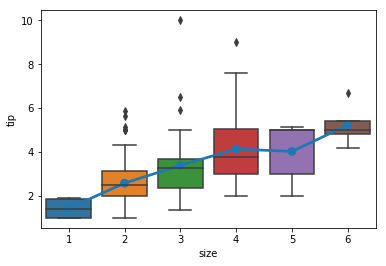

In [3]:
ax = sns.boxplot(x="size", y="tip", data=tips)
ax = sns.pointplot(x="size",y='tip',data=tips,errwidth=0)

/Users/chenyl/.virtualenvs/python-lib-test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/chenyl/.virtualenvs/python-lib-test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/chenyl/.virtualenvs/python-lib-test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/chenyl/.virtualenvs/python-lib-test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The '

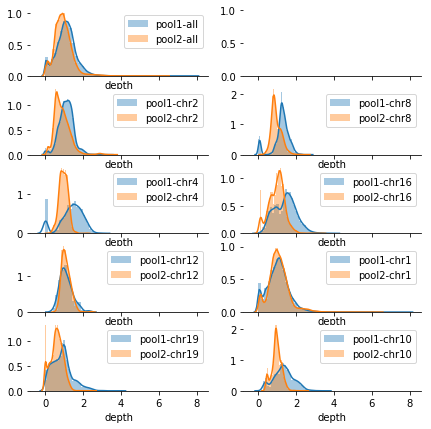

In [4]:
merge_csv = pd.read_csv('./demo_data/merge.csv')
merge_csv.columns=['tag','loc','depth','pool']
merge_csv['chr-temp'] = merge_csv['loc'].str.split(':')
merge_csv['chr'] = merge_csv['chr-temp'].str.get(0)
# print(merge_csv[''])

f, axes = plt.subplots(int((len(set(merge_csv['chr']))+1)/2)+1, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

sns.distplot(merge_csv[merge_csv['pool']=='POOL=1']['depth'], kde=True,label='pool1-all',ax=axes[0,0])
sns.distplot(merge_csv[merge_csv['pool']=='POOL=2']['depth'], kde=True,label='pool2-all',ax=axes[0,0])
axes[0,0].legend()
# axes[0,1].legend()
for j,i in enumerate(set(merge_csv['chr'])):
    sns.distplot(merge_csv[(merge_csv['pool']=='POOL=1') & (merge_csv['chr']==i)]['depth'], 
                      kde=True,label='pool1-chr{}'.format(i),ax=axes[int(j/2)+1,j%2])
    sns.distplot(merge_csv[(merge_csv['pool']=='POOL=2') &(merge_csv['chr']==i)]['depth'], 
                      kde=True,label='pool2-chr{}'.format(i),ax=axes[int(j/2)+1,j%2])
    axes[int(j/2)+1,j%2].legend()
